In [118]:
import knn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import optuna
from sklearn.metrics import balanced_accuracy_score

In [157]:
timeout=300

In [158]:
banana = pd.read_csv("./banana_quality.csv")

In [159]:
# as category
banana['Quality'] = banana['Quality'].astype('category').cat.codes

<Axes: >

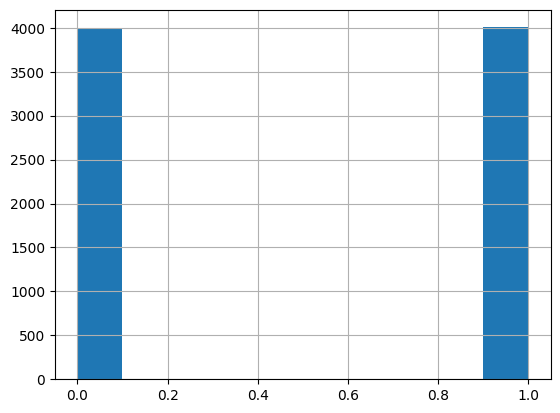

In [160]:
banana['Quality'].hist()

In [161]:
# normalize
Y = banana['Quality'].to_numpy()
X = banana.drop('Quality', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X.to_numpy())
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1337)


In [162]:
# opt method
def opt(trial):
    window_type = trial.suggest_categorical('window_type', ['FIXED', 'FLOAT'])
    if window_type == 'FLOAT':
        window_size = None
        k_neighbors = trial.suggest_int('k_neighbors', 1, 16)
    elif window_type == 'FIXED':
        k_neighbors = None
        window_size = trial.suggest_float('window_size', 0e-3, 10)
    else:
        raise Exception('Unexpected window size')
    kernel_type = trial.suggest_categorical('kernel_type', ['uniform', 'triangular', 'epanechnikov', 'gaussian'])
    if kernel_type == 'uniform':
        kernel = knn.uniform
    elif kernel_type == 'triangular':
        kernel = knn.triangular
    elif kernel_type == 'epanechnikov':
        kernel = knn.epanechnikov
    elif kernel_type == 'gaussian':
        kernel = knn.gaussian
    else:
        raise Exception('Unexpected kernel')
    metric_type = trial.suggest_categorical('metric_type', ['cos_metric', 'euclid_metric', 'chebyshev_metric'])
    if metric_type == 'cos_metric':
        metric = knn.cos_metric
    elif metric_type == 'euclid_metric':
        metric = knn.euclid_metric
    elif metric_type == 'chebyshev_metric':
        metric = knn.chebyshev_metric
    else:
        raise Exception('Unexpected metric')
    model = knn.KNN(
        k_neighbors=k_neighbors,
        window_size=window_size,
        metric=metric,
        kernel=kernel
    )
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    return balanced_accuracy_score(predicted, Y_test)

In [163]:
# find hyperparams

study = optuna.create_study(direction='maximize')
study.optimize(opt, timeout=timeout, show_progress_bar=True, gc_after_trial=True, catch=Exception)
print(study.best_params)
print(study.best_value)

[I 2024-04-01 21:05:09,854] A new study created in memory with name: no-name-39c73f27-71ce-479d-adee-70354b5573e7


   0%|          | 00:00/05:00

[I 2024-04-01 21:05:33,119] Trial 0 finished with value: 0.8561968236550828 and parameters: {'window_type': 'FIXED', 'window_size': 6.432183506590288, 'kernel_type': 'epanechnikov', 'metric_type': 'euclid_metric'}. Best is trial 0 with value: 0.8561968236550828.
[I 2024-04-01 21:05:45,028] Trial 1 finished with value: 0.9725080102883704 and parameters: {'window_type': 'FLOAT', 'k_neighbors': 1, 'kernel_type': 'triangular', 'metric_type': 'chebyshev_metric'}. Best is trial 1 with value: 0.9725080102883704.
[I 2024-04-01 21:06:03,910] Trial 2 finished with value: 0.9327424473445147 and parameters: {'window_type': 'FIXED', 'window_size': 2.6432752586727206, 'kernel_type': 'epanechnikov', 'metric_type': 'chebyshev_metric'}. Best is trial 1 with value: 0.9725080102883704.
[I 2024-04-01 21:06:23,124] Trial 3 finished with value: 0.9155615629145704 and parameters: {'window_type': 'FIXED', 'window_size': 9.593350103203445, 'kernel_type': 'triangular', 'metric_type': 'chebyshev_metric'}. Best i

In [164]:
best_kernel=knn.gaussian
best_metric=knn.euclid_metric

In [165]:
import matplotlib.pyplot as plt

iteration=1
iteration=2
iteration=3
iteration=4
iteration=5
iteration=6
iteration=7
iteration=8
iteration=9
iteration=10
iteration=11
iteration=12
iteration=13
iteration=14


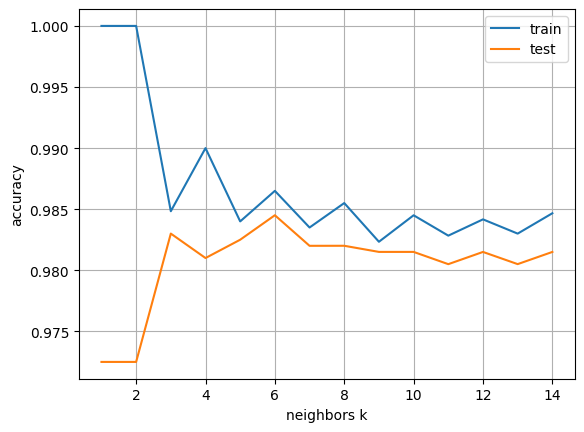

In [166]:
def test_manual(model_gen):
    neigh = []
    score_train = []
    score_test = []
    for i in range(1, 15):
        print(f'iteration={i}')
        model = model_gen(i)
        model.fit(X_train, Y_train)
        res = model.predict(X_test)
        score_test.append(balanced_accuracy_score(Y_test, res))
        res = model.predict(X_train)
        score_train.append(balanced_accuracy_score(Y_train, res))
        neigh.append(i)
    plt.plot(neigh, score_train)
    plt.plot(neigh, score_test)
    plt.grid(True)
    plt.xlabel('neighbors k')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'])
    plt.show()
test_manual(lambda i: knn.KNN(k_neighbors=i, metric=knn.euclid_metric, kernel=knn.gaussian))

In [167]:
best_neighbors = 6

In [168]:
import numpy as np

In [169]:
# lowess
def lowess(model):
    weights = []
    for i in range(len(X_train)):
        if (i + 1) % 100 == 0:
            print(f'iteration={i + 1}')
        x = X_train[i]
        y = Y_train[i]
        x_p = np.delete(X_train, i, axis=0)
        new_y_train = np.delete(Y_train, i, axis=0)
        model.fit(x_p, new_y_train)
        if isinstance(model, KNeighborsClassifier):
            coef = model.predict_proba([x])[0][y]
        else:
            model.predict_one(x)
            coef = model.probabilities.get(y, 0.0)
        weights.append(coef)
    return weights
model = knn.KNN(k_neighbors=7, metric=knn.euclid_metric, kernel=knn.gaussian)
weights = lowess(model)

iteration=100
iteration=200
iteration=300
iteration=400
iteration=500
iteration=600
iteration=700
iteration=800
iteration=900
iteration=1000
iteration=1100
iteration=1200
iteration=1300
iteration=1400
iteration=1500
iteration=1600
iteration=1700
iteration=1800
iteration=1900
iteration=2000
iteration=2100
iteration=2200
iteration=2300
iteration=2400
iteration=2500
iteration=2600
iteration=2700
iteration=2800
iteration=2900
iteration=3000
iteration=3100
iteration=3200
iteration=3300
iteration=3400
iteration=3500
iteration=3600
iteration=3700
iteration=3800
iteration=3900
iteration=4000
iteration=4100
iteration=4200
iteration=4300
iteration=4400
iteration=4500
iteration=4600
iteration=4700
iteration=4800
iteration=4900
iteration=5000
iteration=5100
iteration=5200
iteration=5300
iteration=5400
iteration=5500
iteration=5600
iteration=5700
iteration=5800
iteration=5900
iteration=6000


In [170]:
# lowess
np_weigths = np.array(weights)
print(f'Lowess_gaus: {balanced_accuracy_score(Y_test, model.predict(X_test, knn.gaussian(np_weigths)))}')
print(f'Lowess_uni: {balanced_accuracy_score(Y_test, model.predict(X_test, knn.uniform(np_weigths)))}')
print(f'Ones: {balanced_accuracy_score(Y_test, model.predict(X_test))}')


Lowess_gaus: 0.9825043425390828
Lowess_uni: 0.9820058380525425
Ones: 0.9820058380525425


In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
def opt(trial) :
    k_neighbors = trial.suggest_int('k_neighbors', 1, 16)
    metric_type = trial.suggest_categorical('metric_type', ['cos_metric', 'euclid_metric', 'chebyshev_metric'])
    if metric_type == 'cos_metric':
        metric = knn.cos_metric
    elif metric_type == 'euclid_metric':
        metric = knn.euclid_metric
    elif metric_type == 'chebyshev_metric':
        metric = knn.chebyshev_metric
    else:
        raise Exception('Unexpected metric')
    model = KNeighborsClassifier(
        n_neighbors=k_neighbors,
        metric=metric
    )
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    return balanced_accuracy_score(predicted, Y_test)

In [173]:
# same with library algo
study = optuna.create_study(direction='maximize')
study.optimize(opt, timeout=timeout, show_progress_bar=True, gc_after_trial=True)
print(study.best_params)
print(study.best_value)

[I 2024-04-01 21:31:58,052] A new study created in memory with name: no-name-f241ba44-0d50-4587-897b-48b0ced8f46f


   0%|          | 00:00/05:00

[I 2024-04-01 21:32:09,764] Trial 0 finished with value: 0.9751002158495221 and parameters: {'k_neighbors': 2, 'metric_type': 'euclid_metric'}. Best is trial 0 with value: 0.9751002158495221.
[I 2024-04-01 21:32:22,264] Trial 1 finished with value: 0.9815137042192675 and parameters: {'k_neighbors': 6, 'metric_type': 'chebyshev_metric'}. Best is trial 1 with value: 0.9815137042192675.
[I 2024-04-01 21:32:25,349] Trial 2 finished with value: 0.976999792998137 and parameters: {'k_neighbors': 9, 'metric_type': 'cos_metric'}. Best is trial 1 with value: 0.9815137042192675.
[I 2024-04-01 21:32:39,186] Trial 3 finished with value: 0.9805049220196881 and parameters: {'k_neighbors': 13, 'metric_type': 'euclid_metric'}. Best is trial 1 with value: 0.9815137042192675.
[I 2024-04-01 21:32:52,172] Trial 4 finished with value: 0.9820019820019821 and parameters: {'k_neighbors': 7, 'metric_type': 'euclid_metric'}. Best is trial 4 with value: 0.9820019820019821.
[I 2024-04-01 21:32:55,349] Trial 5 fini

In [174]:
model.fit(X_train, Y_train)
print("Ones", balanced_accuracy_score(Y_test,  model.predict(X_test)))
print("Best founded: " + str(study.best_params) + " with value: " + str(study.best_value))

Ones 0.9820058380525425
Best founded: {'k_neighbors': 8, 'metric_type': 'euclid_metric'} with value: 0.9825263709493541


iteration=1
iteration=2
iteration=3
iteration=4
iteration=5
iteration=6
iteration=7
iteration=8
iteration=9
iteration=10
iteration=11
iteration=12
iteration=13
iteration=14


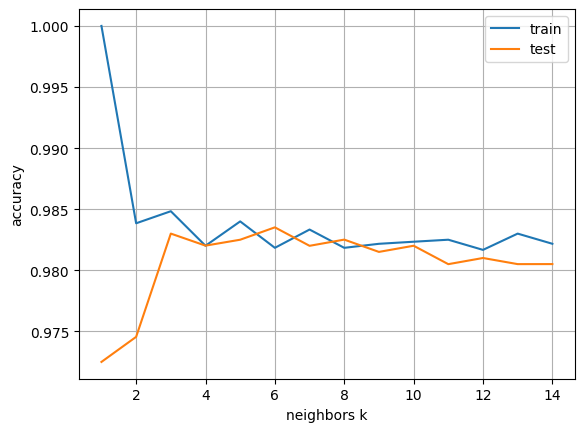

In [175]:
test_manual(lambda i: KNeighborsClassifier(n_neighbors=i, metric=knn.euclid_metric))

In [177]:
best_neighbors = 6

In [ ]:
weights = lowess(model)

In [178]:
# lowess
model = KNeighborsClassifier(
    n_neighbors=best_neighbors,
    metric=best_metric
)
weights = np.array(weights)
uni_weights = knn.uniform(np_weigths)
gaus_weights = knn.gaussian(np_weigths)

model.fit(X_train, Y_train)
sample_indices = np.random.choice(np.arange(len(X_train)), size=len(X_train), p=uni_weights/np.sum(uni_weights))
X_train_u = X_train[sample_indices]
Y_train_u = Y_train[sample_indices]

sample_indices = np.random.choice(np.arange(len(X_train)), size=len(X_train), p=gaus_weights/np.sum(gaus_weights))
X_train_g = X_train[sample_indices]
Y_train_g = Y_train[sample_indices]

print(f'Ones: {balanced_accuracy_score(Y_test, model.predict(X_test))}')
model.fit(X_train_u, Y_train_u)
print(f'Lowess_uni: {balanced_accuracy_score(Y_test, model.predict(X_test))}')
model.fit(X_train_g, Y_train_g)
print(f'Lowess_gaus: {balanced_accuracy_score(Y_test, model.predict(X_test))}')

Lowess_uni: 0.9805103245929213
Lowess_gaus: 0.9770297932681393
iteration=100
iteration=200
iteration=300
iteration=400
iteration=500
iteration=600
iteration=700
iteration=800
iteration=900
iteration=1000
iteration=1100
iteration=1200
iteration=1300
iteration=1400
iteration=1500
iteration=1600
iteration=1700
iteration=1800
iteration=1900
iteration=2000
iteration=2100
iteration=2200
iteration=2300
iteration=2400
iteration=2500
iteration=2600
iteration=2700
iteration=2800
iteration=2900
iteration=3000
iteration=3100
iteration=3200
iteration=3300
iteration=3400
iteration=3500
iteration=3600
iteration=3700
iteration=3800
iteration=3900
iteration=4000
iteration=4100
iteration=4200
iteration=4300
iteration=4400
iteration=4500
iteration=4600
iteration=4700
iteration=4800
iteration=4900
iteration=5000
iteration=5100
iteration=5200
iteration=5300
iteration=5400
iteration=5500
iteration=5600
iteration=5700
iteration=5800
iteration=5900
iteration=6000
Ones: 0.9835163516471648
Lowess_uni: 0.9810118